In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kfold import two_fold_split, three_fold_split, four_fold_split, five_fold_split
from normalizers import MinMaxNormalizer, StandardScaler
from metrics import MSE, RMSE
from LR_Model import LinearRegression
from plot_utils import plot_RMSEs

In [2]:
df_data = pd.read_csv('Real estate.csv', index_col=0)

In [3]:
df_data

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6


In [4]:
df_data['Years since'] = df_data['X1 transaction date'].apply(lambda x: 2018 - int(str(x).split('.')[0]))

In [5]:
df_data

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,Years since
No,,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,6
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,6
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,5
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,5
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,6
...,...,...,...,...,...,...,...,...
410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4,5
411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0,6
412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6,5


In [6]:
X = df_data.drop(columns=['Y house price of unit area', 'X1 transaction date'])
y = df_data['Y house price of unit area']

In [7]:
two_folds = two_fold_split(X, y)
three_folds = three_fold_split(X, y)
four_folds = four_fold_split(X, y)
five_folds = five_fold_split(X, y)

In [8]:
def add_ones(X):
    return np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

In [9]:
def solveNormalEquation(X, y):
    """
    Implementation of a function to solve the normal equation

    Args:
        X: Data to solve
        y: Labels to solve

    Returns:
        The solution to the normal equation
    """
    # X = add_ones(X)
    params = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return params

In [10]:
def evaluate_model(X, y, params):
    """
    Implementation of a function to evaluate the model

    Args:
        X: Data to evaluate
        y: Labels to evaluate
        params: Parameters of the model

    Returns:
        The evaluation of the model
    """
    y_pred = X.dot(params)
    return RMSE(y, y_pred), MSE(y, y_pred)

# Gradient Descent

In [11]:
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1, 10]

K = 2

In [26]:
for learning_rate in learning_rates:
    valRMSEs = []
    valMSEs = []
    trainRMSEs = []
    trainMSEs = []
    print(f'Learning Rate: {learning_rate}')
    for fold in two_folds:
        X_train, y_train, X_test, y_test = fold

        standard_scaler = StandardScaler()
        X_train = standard_scaler.fit_transform(X_train)
        X_test = standard_scaler.transform(X_test) 

        X_train = add_ones(X_train)
        X_test = add_ones(X_test)

        LR = LinearRegression(learning_rate=learning_rate, epochs=1000, early_stopping=True)
        LR.fit(X_train, y_train)
        params = LR.get_params()

        rmse_val, mse_val = evaluate_model(X_test, y_test, params)

        valRMSEs.append(rmse_val)
        valMSEs.append(mse_val)

        rmse_train, mse_train = evaluate_model(X_train, y_train, params)
        trainMSEs.append(mse_train)
        trainRMSEs.append(rmse_train)
        print(f"Validation RMSE: {rmse_val}, Validation MSE: {mse_val}")
        # print(f"Training RMSE: {rmse_train}, Training MSE: {mse_train}")
    print(f"For Validation - Average RMSE: {np.mean(valRMSEs)}, RMSE Variance: {np.var(valRMSEs)}")
    # print(f"For Validation - Average MSE: {np.mean(mse_val)}, MSE Variance: {np.var(mse_val)}")
    print(f"For Training - Average RMSE: {np.mean(trainRMSEs)}, RMSE Variance: {np.var(trainRMSEs)}")
    # print(f"For Training - Average MSE: {np.mean(mse_train)}, MSE Variance: {np.var(mse_train)}")
    print()

Learning Rate: 0.0001
Validation RMSE: 36.214587773310285, Validation MSE: 1311.496367590795
Validation RMSE: 35.816254490787934, Validation MSE: 1282.804085748887
For Validation - Average RMSE: 36.01542113204911, RMSE Variance: 0.039667350991257844
For Training - Average RMSE: 36.006943388218325, RMSE Variance: 0.008231790478827305

Learning Rate: 0.001
Validation RMSE: 16.640112872492434, Validation MSE: 276.89335640928846
Validation RMSE: 16.462243939582923, Validation MSE: 271.0054755263347
For Validation - Average RMSE: 16.55117840603768, RMSE Variance: 0.007909339323592082
For Training - Average RMSE: 16.485028188659257, RMSE Variance: 0.09449232445420529

Learning Rate: 0.01
Validation RMSE: 8.165105652285218, Validation MSE: 66.66895031298003
Validation RMSE: 9.629049634769604, Validation MSE: 92.71859686885664
For Validation - Average RMSE: 8.89707764352741, RMSE Variance: 0.5357829959630609
For Training - Average RMSE: 8.730389008224652, RMSE Variance: 0.5452806822784588

Lea

## As we can see a LR of 0.1 performs the best so we'll plot that and have a look

In [42]:
all_trainRMSEs = []
all_valRMSEs = []
RMSEs = []
MSEs = []
for fold in two_folds:
    X_train, y_train, X_test, y_test = fold
    standard_scaler = StandardScaler()
    X_train = standard_scaler.fit_transform(X_train)
    X_test = standard_scaler.transform(X_test) 
    X_train = add_ones(X_train)
    X_test = add_ones(X_test)
    LR = LinearRegression(learning_rate=0.1, epochs=1000, early_stopping=True)
    LR.fit(X_train, y_train, X_test, y_test)
    params = LR.get_params()
    all_trainRMSEs.append(LR.get_trainRMSEs())
    all_valRMSEs.append(LR.get_valRMSEs())
print()

<module 'matplotlib.pyplot' from 'C:\\Users\\ASUS\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python39\\site-packages\\matplotlib\\pyplot.py'>

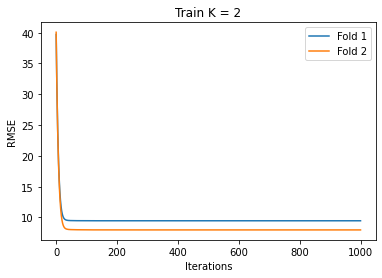

In [43]:
plot_RMSEs(all_trainRMSEs, "Train K = 2", "Iterations", "RMSE")

<module 'matplotlib.pyplot' from 'C:\\Users\\ASUS\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python39\\site-packages\\matplotlib\\pyplot.py'>

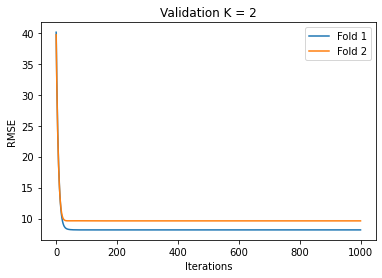

In [44]:
plot_RMSEs(all_valRMSEs, "Validation K = 2", "Iterations", "RMSE")

K = 3

In [27]:
for learning_rate in learning_rates:
    valRMSEs = []
    valMSEs = []
    trainRMSEs = []
    trainMSEs = []
    print(f'Learning Rate: {learning_rate}')
    for fold in three_folds:
        X_train, y_train, X_test, y_test = fold

        standard_scaler = StandardScaler()
        X_train = standard_scaler.fit_transform(X_train)
        X_test = standard_scaler.transform(X_test) 

        X_train = add_ones(X_train)
        X_test = add_ones(X_test)

        LR = LinearRegression(learning_rate=learning_rate, epochs=1000, early_stopping=True)
        LR.fit(X_train, y_train)
        params = LR.get_params()

        rmse_val, mse_val = evaluate_model(X_test, y_test, params)

        valRMSEs.append(rmse_val)
        valMSEs.append(mse_val)

        rmse_train, mse_train = evaluate_model(X_train, y_train, params)
        trainMSEs.append(mse_train)
        trainRMSEs.append(rmse_train)
        print(f"Validation RMSE: {rmse_val}, Validation MSE: {mse_val}")
        # print(f"Training RMSE: {rmse_train}, Training MSE: {mse_train}")
    print(f"For Validation - Average RMSE: {np.mean(valRMSEs)}, RMSE Variance: {np.var(valRMSEs)}")
    # print(f"For Validation - Average MSE: {np.mean(mse_val)}, MSE Variance: {np.var(mse_val)}")
    print(f"For Training - Average RMSE: {np.mean(trainRMSEs)}, RMSE Variance: {np.var(trainRMSEs)}")
    # print(f"For Training - Average MSE: {np.mean(mse_train)}, MSE Variance: {np.var(mse_train)}")
    print()

Learning Rate: 0.0001
Validation RMSE: 36.73947356534616, Validation MSE: 1349.7889178587693
Validation RMSE: 36.01914827001337, Validation MSE: 1297.379042097207
Validation RMSE: 35.2821101665008, Validation MSE: 1244.8272978010991
For Validation - Average RMSE: 36.01357733395344, RMSE Variance: 0.35400019704664154
For Training - Average RMSE: 36.00837256368507, RMSE Variance: 0.07546264074810426

Learning Rate: 0.001
Validation RMSE: 16.860427062435036, Validation MSE: 284.27400072769177
Validation RMSE: 17.319894362286966, Validation MSE: 299.9787407207798
Validation RMSE: 15.41354709832028, Validation MSE: 237.57743415213753
For Validation - Average RMSE: 16.53128950768076, RMSE Variance: 0.6598590801136908
For Training - Average RMSE: 16.494837105934213, RMSE Variance: 0.04413064494311388

Learning Rate: 0.01
Validation RMSE: 8.242068626301526, Validation MSE: 67.93169524066393
Validation RMSE: 10.204615502512498, Validation MSE: 104.13417755411841
Validation RMSE: 8.1617055235760

## As we can see a LR of 0.1 performs the best so we'll plot that and have a look

In [45]:
all_trainRMSEs = []
all_valRMSEs = []
RMSEs = []
MSEs = []
for fold in three_folds:
    X_train, y_train, X_test, y_test = fold
    standard_scaler = StandardScaler()
    X_train = standard_scaler.fit_transform(X_train)
    X_test = standard_scaler.transform(X_test) 
    X_train = add_ones(X_train)
    X_test = add_ones(X_test)
    LR = LinearRegression(learning_rate=0.1, epochs=1000, early_stopping=True)
    LR.fit(X_train, y_train, X_test, y_test)
    params = LR.get_params()
    all_trainRMSEs.append(LR.get_trainRMSEs())
    all_valRMSEs.append(LR.get_valRMSEs())
print()

<module 'matplotlib.pyplot' from 'C:\\Users\\ASUS\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python39\\site-packages\\matplotlib\\pyplot.py'>

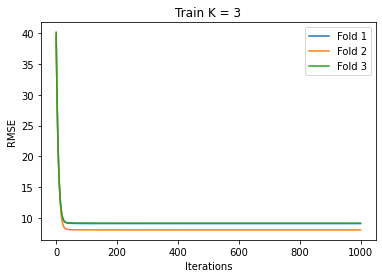

In [46]:
plot_RMSEs(all_trainRMSEs, "Train K = 3", "Iterations", "RMSE")

<module 'matplotlib.pyplot' from 'C:\\Users\\ASUS\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python39\\site-packages\\matplotlib\\pyplot.py'>

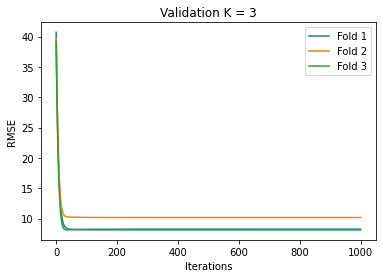

In [47]:
plot_RMSEs(all_valRMSEs, "Validation K = 3", "Iterations", "RMSE")

K = 4

In [36]:
for learning_rate in learning_rates:
    valRMSEs = []
    valMSEs = []
    trainRMSEs = []
    trainMSEs = []
    print(f'Learning Rate: {learning_rate}')
    for fold in four_folds:
        X_train, y_train, X_test, y_test = fold

        standard_scaler = StandardScaler()
        X_train = standard_scaler.fit_transform(X_train)
        X_test = standard_scaler.transform(X_test) 

        X_train = add_ones(X_train)
        X_test = add_ones(X_test)

        LR = LinearRegression(learning_rate=learning_rate, epochs=1000, early_stopping=True)
        LR.fit(X_train, y_train)
        params = LR.get_params()

        rmse_val, mse_val = evaluate_model(X_test, y_test, params)

        valRMSEs.append(rmse_val)
        valMSEs.append(mse_val)

        rmse_train, mse_train = evaluate_model(X_train, y_train, params)
        trainMSEs.append(mse_train)
        trainRMSEs.append(rmse_train)
        print(f"Validation RMSE: {rmse_val}, Validation MSE: {mse_val}")
        # print(f"Training RMSE: {rmse_train}, Training MSE: {mse_train}")
    print(f"For Validation - Average RMSE: {np.mean(valRMSEs)}, RMSE Variance: {np.var(valRMSEs)}")
    # print(f"For Validation - Average MSE: {np.mean(mse_val)}, MSE Variance: {np.var(mse_val)}")
    print(f"For Training - Average RMSE: {np.mean(trainRMSEs)}, RMSE Variance: {np.var(trainRMSEs)}")
    # print(f"For Training - Average MSE: {np.mean(mse_train)}, MSE Variance: {np.var(mse_train)}")
    print()

Learning Rate: 0.0001
Validation RMSE: 36.247718644869835, Validation MSE: 1313.8971069576442
Validation RMSE: 36.09479003905462, Validation MSE: 1302.8338679634367
Validation RMSE: 36.129290180599426, Validation MSE: 1305.3256089539582
Validation RMSE: 35.57462579986026, Validation MSE: 1265.554000800083
For Validation - Average RMSE: 36.01160616609603, RMSE Variance: 0.06686750677457182
For Training - Average RMSE: 36.00972583774011, RMSE Variance: 0.0033083854204209273

Learning Rate: 0.001
Validation RMSE: 16.288022785777667, Validation MSE: 265.2996862700125
Validation RMSE: 16.66312980076215, Validation MSE: 277.65989475704765
Validation RMSE: 17.331599052044304, Validation MSE: 300.38432570082296
Validation RMSE: 15.840916748486539, Validation MSE: 250.93464343248132
For Validation - Average RMSE: 16.530917096767666, RMSE Variance: 0.2984174798856341
For Training - Average RMSE: 16.496843437592865, RMSE Variance: 0.043591155809291134

Learning Rate: 0.01
Validation RMSE: 7.00814

## As we can see a LR of 0.01 performs the best so we'll plot that and have a look

In [48]:
all_trainRMSEs = []
all_valRMSEs = []
RMSEs = []
MSEs = []
for fold in four_folds:
    X_train, y_train, X_test, y_test = fold
    standard_scaler = StandardScaler()
    X_train = standard_scaler.fit_transform(X_train)
    X_test = standard_scaler.transform(X_test) 
    X_train = add_ones(X_train)
    X_test = add_ones(X_test)
    LR = LinearRegression(learning_rate=0.01, epochs=1000, early_stopping=True)
    LR.fit(X_train, y_train, X_test, y_test)
    params = LR.get_params()
    all_trainRMSEs.append(LR.get_trainRMSEs())
    all_valRMSEs.append(LR.get_valRMSEs())
print()

<module 'matplotlib.pyplot' from 'C:\\Users\\ASUS\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python39\\site-packages\\matplotlib\\pyplot.py'>

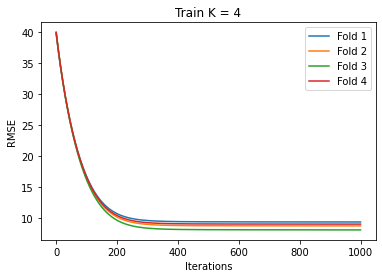

In [49]:
plot_RMSEs(all_trainRMSEs, "Train K = 4", "Iterations", "RMSE")

<module 'matplotlib.pyplot' from 'C:\\Users\\ASUS\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python39\\site-packages\\matplotlib\\pyplot.py'>

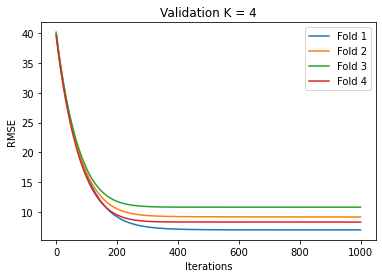

In [50]:
plot_RMSEs(all_valRMSEs, "Validation K = 4", "Iterations", "RMSE")

K = 5

In [51]:
for learning_rate in learning_rates:
    valRMSEs = []
    valMSEs = []
    trainRMSEs = []
    trainMSEs = []
    print(f'Learning Rate: {learning_rate}')
    for fold in five_folds:
        X_train, y_train, X_test, y_test = fold

        standard_scaler = StandardScaler()
        X_train = standard_scaler.fit_transform(X_train)
        X_test = standard_scaler.transform(X_test) 

        X_train = add_ones(X_train)
        X_test = add_ones(X_test)

        LR = LinearRegression(learning_rate=learning_rate, epochs=1000, early_stopping=True)
        LR.fit(X_train, y_train)
        params = LR.get_params()

        rmse_val, mse_val = evaluate_model(X_test, y_test, params)

        valRMSEs.append(rmse_val)
        valMSEs.append(mse_val)

        rmse_train, mse_train = evaluate_model(X_train, y_train, params)
        trainMSEs.append(mse_train)
        trainRMSEs.append(rmse_train)
        print(f"Validation RMSE: {rmse_val}, Validation MSE: {mse_val}")
        # print(f"Training RMSE: {rmse_train}, Training MSE: {mse_train}")
    print(f"For Validation - Average RMSE: {np.mean(valRMSEs)}, RMSE Variance: {np.var(valRMSEs)}")
    # print(f"For Validation - Average MSE: {np.mean(mse_val)}, MSE Variance: {np.var(mse_val)}")
    print(f"For Training - Average RMSE: {np.mean(trainRMSEs)}, RMSE Variance: {np.var(trainRMSEs)}")
    # print(f"For Training - Average MSE: {np.mean(mse_train)}, MSE Variance: {np.var(mse_train)}")
    print()

Learning Rate: 0.0001
Validation RMSE: 36.002555641050144, Validation MSE: 1296.1840126869115
Validation RMSE: 37.18158163913651, Validation MSE: 1382.4700131877732
Validation RMSE: 35.32325273552617, Validation MSE: 1247.7321838178568
Validation RMSE: 36.32494644686623, Validation MSE: 1319.5017343676993
Validation RMSE: 35.23164782644089, Validation MSE: 1241.2690085663571
For Validation - Average RMSE: 36.01279685780399, RMSE Variance: 0.5098530038628459
For Training - Average RMSE: 36.01050563258034, RMSE Variance: 0.033575947123506984

Learning Rate: 0.001
Validation RMSE: 15.950620949442124, Validation MSE: 254.42230867278198
Validation RMSE: 17.688283351885264, Validation MSE: 312.8753679365814
Validation RMSE: 15.439037097855426, Validation MSE: 238.36386650895608
Validation RMSE: 17.745379984223877, Validation MSE: 314.89851078449345
Validation RMSE: 15.659314606027692, Validation MSE: 245.2141339305522
For Validation - Average RMSE: 16.496527197886877, RMSE Variance: 1.019427

## As we can see a LR of 0.1 performs the best so we'll plot that and have a look

In [52]:
all_trainRMSEs = []
all_valRMSEs = []
RMSEs = []
MSEs = []
for fold in five_folds:
    X_train, y_train, X_test, y_test = fold
    standard_scaler = StandardScaler()
    X_train = standard_scaler.fit_transform(X_train)
    X_test = standard_scaler.transform(X_test) 
    X_train = add_ones(X_train)
    X_test = add_ones(X_test)
    LR = LinearRegression(learning_rate=0.1, epochs=1000, early_stopping=True)
    LR.fit(X_train, y_train, X_test, y_test)
    params = LR.get_params()
    all_trainRMSEs.append(LR.get_trainRMSEs())
    all_valRMSEs.append(LR.get_valRMSEs())
print()

<module 'matplotlib.pyplot' from 'C:\\Users\\ASUS\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python39\\site-packages\\matplotlib\\pyplot.py'>

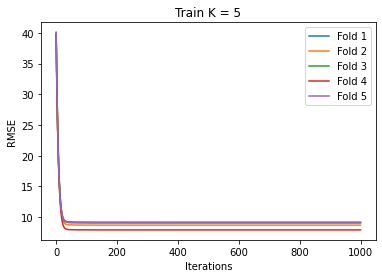

In [53]:
plot_RMSEs(all_trainRMSEs, "Train K = 5", "Iterations", "RMSE")

<module 'matplotlib.pyplot' from 'C:\\Users\\ASUS\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python39\\site-packages\\matplotlib\\pyplot.py'>

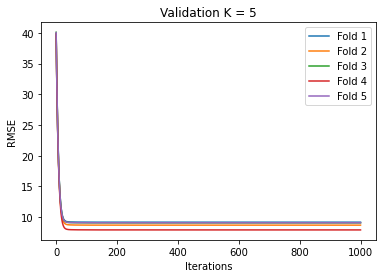

In [54]:
plot_RMSEs(all_trainRMSEs, "Validation K = 5", "Iterations", "RMSE")

K = 5 with all LRs (except 0.1 which is plotted above)

In [63]:
all_trainRMSEs = []
all_valRMSEs = []
RMSEs = []
MSEs = []
for fold in five_folds:
    X_train, y_train, X_test, y_test = fold
    standard_scaler = StandardScaler()
    X_train = standard_scaler.fit_transform(X_train)
    X_test = standard_scaler.transform(X_test) 
    X_train = add_ones(X_train)
    X_test = add_ones(X_test)
    LR = LinearRegression(learning_rate=0.0001, epochs=1000, early_stopping=True)
    LR.fit(X_train, y_train, X_test, y_test)
    params = LR.get_params()
    all_trainRMSEs.append(LR.get_trainRMSEs())
    all_valRMSEs.append(LR.get_valRMSEs())
print()

<module 'matplotlib.pyplot' from 'C:\\Users\\ASUS\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python39\\site-packages\\matplotlib\\pyplot.py'>

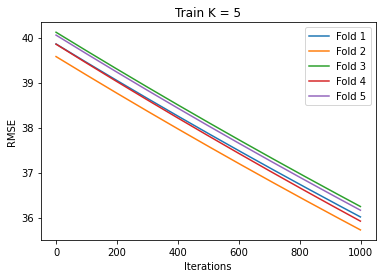

In [64]:
plot_RMSEs(all_trainRMSEs, "Train K = 5", "Iterations", "RMSE")

<module 'matplotlib.pyplot' from 'C:\\Users\\ASUS\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python39\\site-packages\\matplotlib\\pyplot.py'>

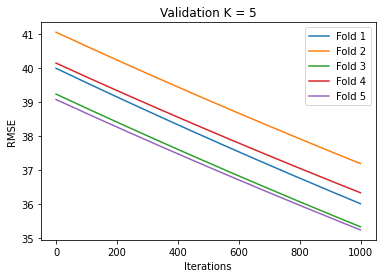

In [65]:
plot_RMSEs(all_valRMSEs, "Validation K = 5", "Iterations", "RMSE")

In [66]:
all_trainRMSEs = []
all_valRMSEs = []
RMSEs = []
MSEs = []
for fold in five_folds:
    X_train, y_train, X_test, y_test = fold
    standard_scaler = StandardScaler()
    X_train = standard_scaler.fit_transform(X_train)
    X_test = standard_scaler.transform(X_test) 
    X_train = add_ones(X_train)
    X_test = add_ones(X_test)
    LR = LinearRegression(learning_rate=0.001, epochs=1000, early_stopping=True)
    LR.fit(X_train, y_train, X_test, y_test)
    params = LR.get_params()
    all_trainRMSEs.append(LR.get_trainRMSEs())
    all_valRMSEs.append(LR.get_valRMSEs())
print()

<module 'matplotlib.pyplot' from 'C:\\Users\\ASUS\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python39\\site-packages\\matplotlib\\pyplot.py'>

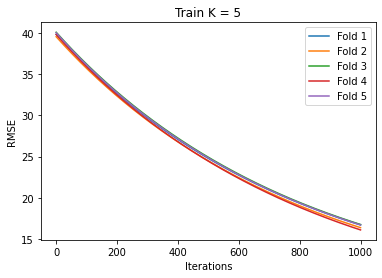

In [67]:
plot_RMSEs(all_trainRMSEs, "Train K = 5", "Iterations", "RMSE")

<module 'matplotlib.pyplot' from 'C:\\Users\\ASUS\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python39\\site-packages\\matplotlib\\pyplot.py'>

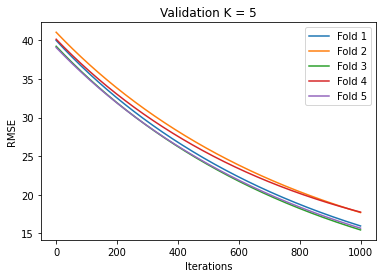

In [68]:
plot_RMSEs(all_valRMSEs, "Validation K = 5", "Iterations", "RMSE")

In [71]:
all_trainRMSEs = []
all_valRMSEs = []
RMSEs = []
MSEs = []
for fold in five_folds:
    X_train, y_train, X_test, y_test = fold
    standard_scaler = StandardScaler()
    X_train = standard_scaler.fit_transform(X_train)
    X_test = standard_scaler.transform(X_test) 
    X_train = add_ones(X_train)
    X_test = add_ones(X_test)
    LR = LinearRegression(learning_rate=0.01, epochs=1000, early_stopping=True)
    LR.fit(X_train, y_train, X_test, y_test)
    params = LR.get_params()
    all_trainRMSEs.append(LR.get_trainRMSEs())
    all_valRMSEs.append(LR.get_valRMSEs())
print()

<module 'matplotlib.pyplot' from 'C:\\Users\\ASUS\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python39\\site-packages\\matplotlib\\pyplot.py'>

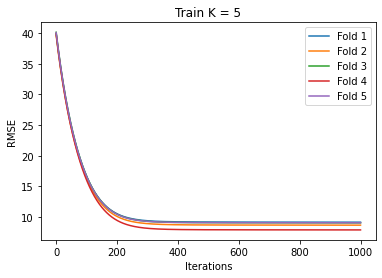

In [72]:
plot_RMSEs(all_trainRMSEs, "Train K = 5", "Iterations", "RMSE")

<module 'matplotlib.pyplot' from 'C:\\Users\\ASUS\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python39\\site-packages\\matplotlib\\pyplot.py'>

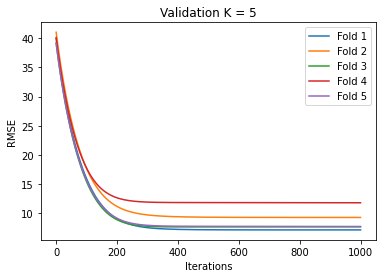

In [73]:
plot_RMSEs(all_valRMSEs, "Validation K = 5", "Iterations", "RMSE")

In [76]:
all_trainRMSEs = []
all_valRMSEs = []
RMSEs = []
MSEs = []
for fold in five_folds:
    X_train, y_train, X_test, y_test = fold
    standard_scaler = StandardScaler()
    X_train = standard_scaler.fit_transform(X_train)
    X_test = standard_scaler.transform(X_test) 
    X_train = add_ones(X_train)
    X_test = add_ones(X_test)
    LR = LinearRegression(learning_rate=1, epochs=1000, early_stopping=True)
    LR.fit(X_train, y_train, X_test, y_test)
    params = LR.get_params()
    all_trainRMSEs.append(LR.get_trainRMSEs())
    all_valRMSEs.append(LR.get_valRMSEs())
print()

<module 'matplotlib.pyplot' from 'C:\\Users\\ASUS\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python39\\site-packages\\matplotlib\\pyplot.py'>

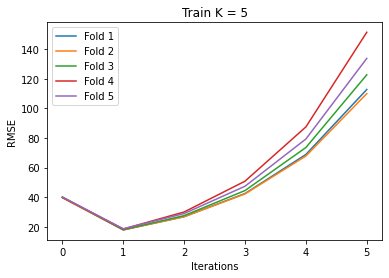

In [77]:
plot_RMSEs(all_trainRMSEs, "Train K = 5", "Iterations", "RMSE")

<module 'matplotlib.pyplot' from 'C:\\Users\\ASUS\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python39\\site-packages\\matplotlib\\pyplot.py'>

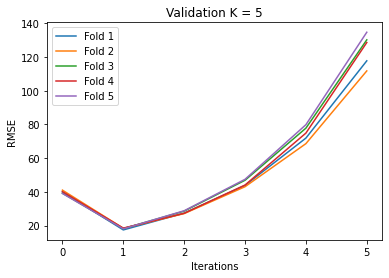

In [78]:
plot_RMSEs(all_valRMSEs, "Validation K = 5", "Iterations", "RMSE")

In [79]:
all_trainRMSEs = []
all_valRMSEs = []
RMSEs = []
MSEs = []
for fold in five_folds:
    X_train, y_train, X_test, y_test = fold
    standard_scaler = StandardScaler()
    X_train = standard_scaler.fit_transform(X_train)
    X_test = standard_scaler.transform(X_test) 
    X_train = add_ones(X_train)
    X_test = add_ones(X_test)
    LR = LinearRegression(learning_rate=10, epochs=1000, early_stopping=True)
    LR.fit(X_train, y_train, X_test, y_test)
    params = LR.get_params()
    all_trainRMSEs.append(LR.get_trainRMSEs())
    all_valRMSEs.append(LR.get_valRMSEs())
print()

<module 'matplotlib.pyplot' from 'C:\\Users\\ASUS\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python39\\site-packages\\matplotlib\\pyplot.py'>

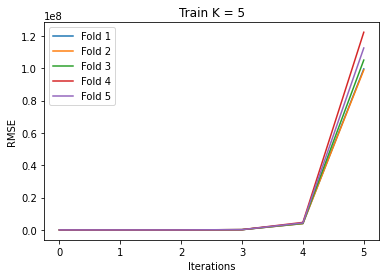

In [80]:
plot_RMSEs(all_trainRMSEs, "Train K = 5", "Iterations", "RMSE")

<module 'matplotlib.pyplot' from 'C:\\Users\\ASUS\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python39\\site-packages\\matplotlib\\pyplot.py'>

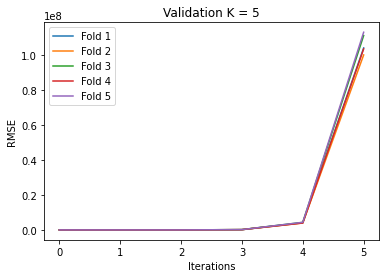

In [81]:
plot_RMSEs(all_valRMSEs, "Validation K = 5", "Iterations", "RMSE")

Train-Test RMSEs for K = 5

In [82]:
for learning_rate in learning_rates:
    val_RMSEs = []
    val_MSEs = []
    train_RMSEs = []
    train_MSEs = []
    print(f'Learning Rate: {learning_rate}')
    for fold in five_folds:
        X_train, y_train, X_test, y_test = fold

        standard_scaler = StandardScaler()
        X_train = standard_scaler.fit_transform(X_train)
        X_test = standard_scaler.transform(X_test) 

        X_train = add_ones(X_train)
        X_test = add_ones(X_test)

        LR = LinearRegression(learning_rate=learning_rate, epochs=1000, early_stopping=True)
        LR.fit(X_train, y_train)
        params = LR.get_params()

        val_RMSE, val_MSE = evaluate_model(X_test, y_test, params)

        val_RMSEs.append(val_RMSE)
        val_MSEs.append(val_MSE)

        train_RMSE, train_MSE = evaluate_model(X_train, y_train, params)

        train_RMSEs.append(train_RMSE)
        train_MSEs.append(train_MSE)

        # print('RMSE: {}, MSE: {}'.format(rmse, mse))
    print(f"Average Val RMSE: {np.mean(val_RMSEs)}, RMSE Variance: {np.var(val_RMSEs)}")
    print(f"Average Train RMSE: {np.mean(train_RMSEs)}, RMSE Variance: {np.var(train_RMSEs)}")
    print()

Learning Rate: 0.0001
Average Val RMSE: 36.01279685780399, RMSE Variance: 0.5098530038628459
Average Train RMSE: 36.01050563258034, RMSE Variance: 0.033575947123506984

Learning Rate: 0.001
Average Val RMSE: 16.496527197886877, RMSE Variance: 1.0194279760515688
Average Train RMSE: 16.502311660962423, RMSE Variance: 0.06453214850134735

Learning Rate: 0.01
Average Val RMSE: 8.705403450836773, RMSE Variance: 2.8712651197947343
Average Train RMSE: 8.785781139555151, RMSE Variance: 0.21633424581739652

Learning Rate: 0.1
Average Val RMSE: 8.703710716525489, RMSE Variance: 2.823659336631281
Average Train RMSE: 8.778941029351845, RMSE Variance: 0.21652764713063033

Learning Rate: 1
Average Val RMSE: 124.57747458646664, RMSE Variance: 72.19475033551696
Average Train RMSE: 126.2045120198442, RMSE Variance: 230.68650614413235

Learning Rate: 10
Average Val RMSE: 106486004.68005028, RMSE Variance: 24241647377181.82
Average Train RMSE: 107607305.64109787, RMSE Variance: 77049656122183.4



# Regularization

In [83]:
reg_lambdas = [0.001, 0.01, 0.1, 1, 10, 100]

## Ridge

In [84]:
for reg_lambda in reg_lambdas:
    valRMSEs = []
    valMSEs = []
    trainRMSEs = []
    trainMSEs = []
    print(f'Regularization Parameter: {reg_lambda}')
    for fold in five_folds:
        X_train, y_train, X_test, y_test = fold

        standard_scaler = StandardScaler()
        X_train = standard_scaler.fit_transform(X_train)
        X_test = standard_scaler.transform(X_test) 

        X_train = add_ones(X_train)
        X_test = add_ones(X_test)

        LR = LinearRegression(learning_rate=learning_rate, epochs=1000, early_stopping=True, regularization='Ridge', reg_lambda=reg_lambda)
        LR.fit(X_train, y_train)
        params = LR.get_params()

        rmse_val, mse_val = evaluate_model(X_test, y_test, params)

        valRMSEs.append(rmse_val)
        valMSEs.append(mse_val)

        rmse_train, mse_train = evaluate_model(X_train, y_train, params)
        trainMSEs.append(mse_train)
        trainRMSEs.append(rmse_train)
        print(f"Validation RMSE: {rmse_val}, Validation MSE: {mse_val}")
        # print(f"Training RMSE: {rmse_train}, Training MSE: {mse_train}")
    print(f"For Validation - Average RMSE: {np.mean(valRMSEs)}, RMSE Variance: {np.var(valRMSEs)}")
    # print(f"For Validation - Average MSE: {np.mean(mse_val)}, MSE Variance: {np.var(mse_val)}")
    print(f"For Training - Average RMSE: {np.mean(trainRMSEs)}, RMSE Variance: {np.var(trainRMSEs)}")
    # print(f"For Training - Average MSE: {np.mean(mse_train)}, MSE Variance: {np.var(mse_train)}")
    print()

reg_lambda: 0.001
RMSE: 7.145128642003718, MSE: 51.052863310781895
RMSE: 9.271127327483907, MSE: 85.95380192241888
RMSE: 7.674398197353708, MSE: 58.89638769154583
RMSE: 11.744928304511292, MSE: 137.9433408781105
RMSE: 7.683865891036609, MSE: 59.04179503143582
Average RMSE: 8.703889672477846, RMSE Variance: 2.81994233619207

reg_lambda: 0.01
RMSE: 7.24005336228657, MSE: 52.41837268875707
RMSE: 9.381230653460175, MSE: 88.00748857342083
RMSE: 7.651046859199967, MSE: 58.53851804167368
RMSE: 11.72634293460031, MSE: 137.50711861985062
RMSE: 7.685752320421812, MSE: 59.07078873086927
Average RMSE: 8.736885225993767, RMSE Variance: 2.7752938787261368

reg_lambda: 0.1
RMSE: 9.928747212221872, MSE: 98.58002120420358
RMSE: 11.930464919959357, MSE: 142.33599320638083
RMSE: 9.591955637962092, MSE: 92.00561296063276
RMSE: 13.047843387285372, MSE: 170.24621705912662
RMSE: 9.797809881331977, MSE: 95.99707847072655
Average RMSE: 10.859364207752135, RMSE Variance: 1.9071935836059317

reg_lambda: 1
RMSE: 

## Lasso

In [30]:
for reg_lambda in reg_lambdas:
    RMSEs = []
    MSEs = []
    print(f'reg_lambda: {reg_lambda}')
    for fold in five_folds:
        X_train, y_train, X_test, y_test = fold

        standard_scaler = StandardScaler()
        X_train = standard_scaler.fit_transform(X_train)
        X_test = standard_scaler.transform(X_test) 

        X_train = add_ones(X_train)
        X_test = add_ones(X_test)

        LR = LinearRegression(learning_rate=0.1, epochs=1000, early_stopping=True, regularization='Lasso', reg_lambda=reg_lambda)
        LR.fit(X_train, y_train)
        params = LR.get_params()

        rmse, mse = evaluate_model(X_test, y_test, params)

        RMSEs.append(rmse)
        MSEs.append(mse)

        print('RMSE: {}, MSE: {}'.format(rmse, mse))
    print(f"Average RMSE: {np.mean(RMSEs)}, RMSE Variance: {np.var(RMSEs)}")
    print()

reg_lambda: 0.001
RMSE: 7.138458135167153, MSE: 50.957584547534104
RMSE: 9.261886465846922, MSE: 85.78254090623838
RMSE: 7.680602382840842, MSE: 58.991652963300425
RMSE: 11.749534935659145, MSE: 138.05157120427475
RMSE: 7.687553348823442, MSE: 59.09847649100653
Average RMSE: 8.7036070536675, RMSE Variance: 2.8235894778201622

reg_lambda: 0.01
RMSE: 7.140616018699864, MSE: 50.98839712651311
RMSE: 9.261311921952696, MSE: 85.77189851570314
RMSE: 7.676440562574069, MSE: 58.92773971073249
RMSE: 11.748515918280695, MSE: 138.02762628209487
RMSE: 7.686836335325262, MSE: 59.08745284607671
Average RMSE: 8.702744151366518, RMSE Variance: 2.822867132079941

reg_lambda: 0.1
RMSE: 7.170115959910152, MSE: 51.41056287855828
RMSE: 9.260417970213503, MSE: 85.75534098305316
RMSE: 7.650324893571293, MSE: 58.527470977196614
RMSE: 11.739875387397467, MSE: 137.82467411162082
RMSE: 7.686377357335927, MSE: 59.08039687936644
Average RMSE: 8.701422313685669, RMSE Variance: 2.8049388848522137

reg_lambda: 1
RMSE:

# Normal Form

K = 2

In [31]:
RMSEs = []
MSEs = []
for fold in two_folds:
    X_train, y_train, X_test, y_test = fold
    params = solveNormalEquation(X_train, y_train)
    rmse, mse = evaluate_model(X_test, y_test, params)
    RMSEs.append(rmse)
    MSEs.append(mse)
    print('RMSE: {}, MSE: {}'.format(rmse, mse))
print(f"Average RMSE: {np.mean(RMSEs)}, Average MSE: {np.mean(MSEs)}")

RMSE: 8.175738783272324, MSE: 66.84270465230323
RMSE: 9.633509564838526, MSE: 92.80450653583539
Average RMSE: 8.904624174055424, Average MSE: 79.8236055940693


K = 3

In [32]:
RMSEs = []
MSEs = []
for fold in three_folds:
    X_train, y_train, X_test, y_test = fold
    params = solveNormalEquation(X_train, y_train)
    rmse, mse = evaluate_model(X_test, y_test, params)
    RMSEs.append(rmse)
    MSEs.append(mse)
    print('RMSE: {}, MSE: {}'.format(rmse, mse))
print(f"Average RMSE: {np.mean(RMSEs)}, Average MSE: {np.mean(MSEs)}")

RMSE: 8.272138626719427, MSE: 68.42827745966356
RMSE: 10.147518357987865, MSE: 102.97212882570075
RMSE: 8.150592907894223, MSE: 66.43216475021562
Average RMSE: 8.856749964200505, Average MSE: 79.27752367852663


K = 4

In [33]:
RMSEs = []
MSEs = []
for fold in four_folds:
    X_train, y_train, X_test, y_test = fold
    params = solveNormalEquation(X_train, y_train)
    rmse, mse = evaluate_model(X_test, y_test, params)
    RMSEs.append(rmse)
    MSEs.append(mse)
    print('RMSE: {}, MSE: {}'.format(rmse, mse))
print(f"Average RMSE: {np.mean(RMSEs)}, Average MSE: {np.mean(MSEs)}")

RMSE: 7.0478014080862526, MSE: 49.67150468782256
RMSE: 9.159832301542467, MSE: 83.90252779238078
RMSE: 10.835062319531874, MSE: 117.39857546813944
RMSE: 8.291573047758881, MSE: 68.7501836063215
Average RMSE: 8.833567269229869, Average MSE: 79.93069788866607


In [34]:
RMSEs = []
MSEs = []
for fold in five_folds:
    X_train, y_train, X_test, y_test = fold
    params = solveNormalEquation(X_train, y_train)
    rmse, mse = evaluate_model(X_test, y_test, params)
    RMSEs.append(rmse)
    MSEs.append(mse)
    print('RMSE: {}, MSE: {}'.format(rmse, mse))
print(f"Average RMSE: {np.mean(RMSEs)}, Average MSE: {np.mean(MSEs)}")

RMSE: 7.15465365030286, MSE: 51.18906885579204
RMSE: 9.266839756448137, MSE: 85.87431907168776
RMSE: 7.695705437572973, MSE: 59.22388218189022
RMSE: 11.724728270732339, MSE: 137.46925302251015
RMSE: 7.693396778376939, MSE: 59.18835398954066
Average RMSE: 8.707064778686648, Average MSE: 78.58897542428416
